In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Read the csv file using 'read_csv'
# using encoding = "ISO-8859-1" to avoid pandas encoding error
uberdata = pd.read_csv('Uber Request Data(1).csv')
uberdata


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [4]:
# Check the number of rows and columns in the dataframe
uberdata.shape

(6745, 6)

In [5]:
uberdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


The datatype of 'Request timestamp' and 'Drop timestamp' is object type,we need to converet it into datetime type

# Cleaning and data preparation

In [6]:
#Chcking the number of null values in rows and columns
uberdata.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [7]:
#Count of unique values in 'Status' column
uberdata['Status'].value_counts()


Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [8]:
#converting column 'Request timestamp', from 'object' to 'datetime type'
uberdata['Request timestamp'] = pd.to_datetime(uberdata['Request timestamp'])

In [9]:
#checking the datatype of column 'Request timestamp',and 'Drop timestamp' again
uberdata.dtypes

Request id                    int64
Pickup point                 object
Driver id                   float64
Status                       object
Request timestamp    datetime64[ns]
Drop timestamp               object
dtype: object

In [10]:
#Creating a new column'Hour of request'
#the new colum contains the hour value extracted from the column 'Request timestamp'
uberdata['Hour of request'] = uberdata['Request timestamp'].dt.hour

In [11]:
uberdata.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Hour of request
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,11/7/2016 18:47,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,12/7/2016 9:58,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,12/7/2016 22:03,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47,8
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,13-07-2016 22:28:59,21
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,14-07-2016 07:13:15,6
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,15-07-2016 06:07:52,5
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,15-07-2016 18:50:51,17
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,11/7/2016 7:25,6


In [13]:
#Creating a new column 'time frequency' containing bins and labels based on the 'Hour of request' column
bins = [0, 4, 8, 12, 16, 20, 24]
labels = ["Late Night","Early Morning","Morning","Afternoon","Evening","Night"]
uberdata['time frequency'] = pd.cut(uberdata['Hour of request'], bins=bins, labels=labels)
uberdata.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Hour of request,time frequency
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,11,Morning
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,11/7/2016 18:47,17,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,12/7/2016 9:58,9,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,12/7/2016 22:03,21,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47,8,Early Morning
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,13-07-2016 22:28:59,21,Night
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,14-07-2016 07:13:15,6,Early Morning
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,15-07-2016 06:07:52,5,Early Morning
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,15-07-2016 18:50:51,17,Evening
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,11/7/2016 7:25,6,Early Morning


In [14]:
uberdata['Demand'] = 1
#'Demand' is the total number of requests, in 'uberdata' dataset, each row is a request

In [15]:
uberdata.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Hour of request,time frequency,Demand
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,11,Morning,1
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,11/7/2016 18:47,17,Evening,1
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,12/7/2016 9:58,9,Morning,1
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,12/7/2016 22:03,21,Night,1
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47,8,Early Morning,1
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,13-07-2016 22:28:59,21,Night,1
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,14-07-2016 07:13:15,6,Early Morning,1
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,15-07-2016 06:07:52,5,Early Morning,1
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,15-07-2016 18:50:51,17,Evening,1
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,11/7/2016 7:25,6,Early Morning,1


# Analysis 1

<Figure size 960x640 with 0 Axes>

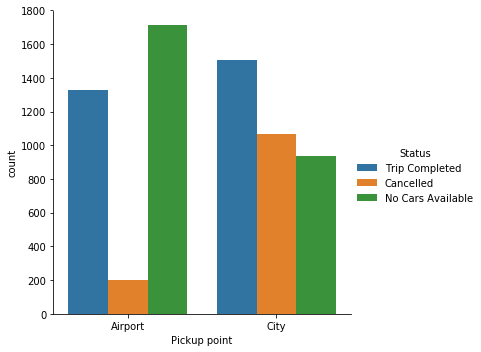

In [71]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
sns.catplot(x="Pickup point", hue="Status", kind="count", data=uberdata);
#sns.catplot(x="Demand", hue="Status", col="Pickup point",data=uberdata,kind="box")

plt.savefig('plot1.png')

From the above plot it can understand that the major problem faced is                                                               
1.Cancellation of trips by drivers and unavailability of vehicles in City                                                                                            
2.More Unavailability of cabs in airport to complete demand

In [17]:
#creating new dataframe frequency of requests containing"Cancelled" and "No Cars available" in the 'Status' column
frequencyofrequests =uberdata[(uberdata['Status'] == 'Cancelled') | (uberdata['Status'] == 'No Cars Available')]
frequencyofrequests.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Hour of request,time frequency,Demand
2831,2905,City,1.0,Cancelled,2016-07-13 06:08:41,NaN,6,Early Morning,1
2832,4805,City,1.0,Cancelled,2016-07-14 17:07:58,NaN,17,Evening,1
2833,5202,Airport,1.0,Cancelled,2016-07-14 20:51:37,NaN,20,Evening,1
2834,5927,City,1.0,Cancelled,2016-07-15 10:12:40,NaN,10,Morning,1
2835,2347,Airport,2.0,Cancelled,2016-12-07 19:14:00,NaN,19,Evening,1
2836,3806,Airport,2.0,Cancelled,2016-07-13 20:57:49,NaN,20,Evening,1
2837,4451,City,2.0,Cancelled,2016-07-14 08:38:38,NaN,8,Early Morning,1
2838,5023,Airport,2.0,Cancelled,2016-07-14 19:04:08,NaN,19,Evening,1
2839,80,City,3.0,Cancelled,2016-11-07 04:47:00,NaN,4,Late Night,1
2840,534,City,3.0,Cancelled,2016-11-07 10:01:00,NaN,10,Morning,1


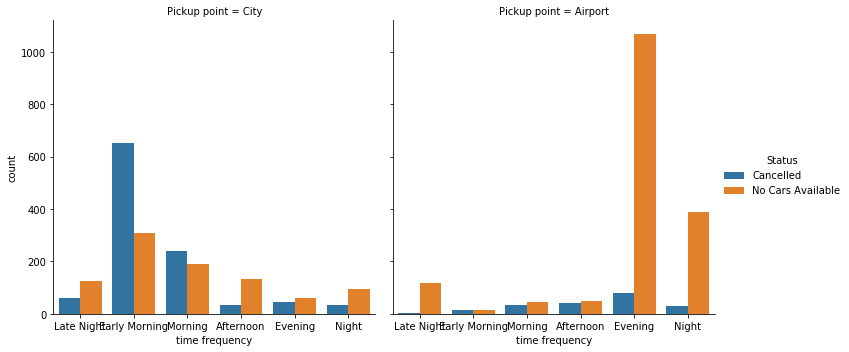

In [72]:
#Create plots to visualise the frequency of requests that get cancelled or show 'no cars available
sns.catplot(x="time frequency", hue="Status", col="Pickup point",data=frequencyofrequests,kind="count")
plt.savefig('plot2.png')

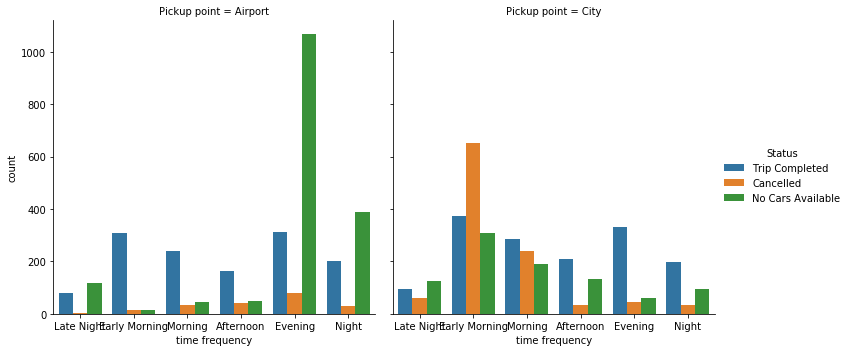

In [73]:

sns.catplot(x="time frequency", hue="Status", col="Pickup point",data=uberdata,kind="count")
plt.savefig('plot3.png')

It is understood from the graph that the cancellations of trips in city are more during Early morning(4-8hrs) and Morning (8-12) time slots                                                                                                                                 
and Unavailability of cars is in airport is more during Evening(16-20hrs) and night(20-24hrs)

In [19]:
#Checking demands in city and airport
uberdata['Pickup point'].value_counts()

City       3507
Airport    3238
Name: Pickup point, dtype: int64

The demand is more from city 
The demand for inflow to Airport is more less Outflow towards city,as well as the cancellations from City to Airport results in more unavailability of cars in Airport
Also,
The most problamatic type of request is from Airport to City

# Analysis 2

In [68]:
#creating new dataframe 'Supply' containing the records of cars available for trips
Supply =uberdata[(uberdata['Status'] == 'Trip Completed')]
Supply.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Hour of request,time frequency,Demand,Supply
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,11,Morning,1,1.0
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,11/7/2016 18:47,17,Evening,1,1.0
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,12/7/2016 9:58,9,Morning,1,1.0
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,12/7/2016 22:03,21,Night,1,1.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47,8,Early Morning,1,1.0
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,13-07-2016 22:28:59,21,Night,1,1.0
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,14-07-2016 07:13:15,6,Early Morning,1,1.0
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,15-07-2016 06:07:52,5,Early Morning,1,1.0
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,15-07-2016 18:50:51,17,Evening,1,1.0
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,11/7/2016 7:25,6,Early Morning,1,1.0


In [69]:
#Creating a new column "Supply" in the new dataset for calculating the total supplies 
#assignning 1 as default value for easiness while calculation
Supply['Supply'] = 1
#Creating new column'Supply in "uberdata" dataframe
uberdata['Supply'] = Supply['Supply']

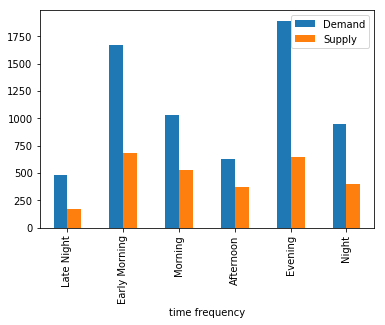

In [74]:
#Demand supply plot on each timeslots
plot1 = uberdata.pivot_table(values = ['Demand','Supply'], index = 'time frequency', aggfunc = 'sum')
plot1.plot(kind = 'bar')
plt.savefig('plot4.png')

In [77]:
#Demand supply plot on each timeslots
plotbytimeslot2 =uberdata[(uberdata['time frequency'] == 'Early Morning') & (uberdata['Pickup point'] == 'City')]
plotbytimeslot3 =uberdata[(uberdata['time frequency'] == 'Evening') & (uberdata['Pickup point'] == 'Airport')]


In [78]:
plot4 = plotbytimeslot2.pivot_table(values = ['Demand','Supply'], index = 'time frequency',columns = 'Pickup point', aggfunc = 'sum')
plot5 = plotbytimeslot3.pivot_table(values = ['Demand','Supply'], index = 'time frequency',columns = 'Pickup point', aggfunc = 'sum')


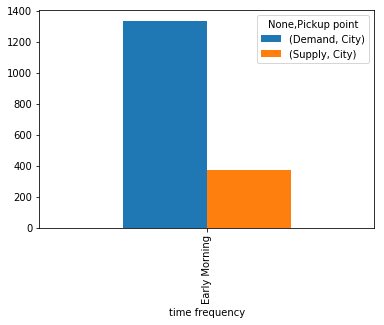

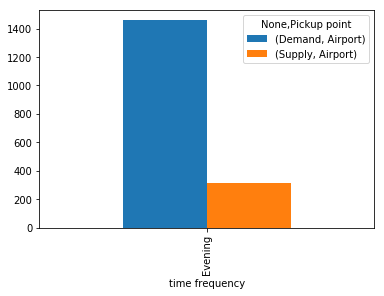

In [80]:
#Demand supply plot from city during early morning
plot4.plot(kind = 'bar')
plt.savefig('plot5.png')
#Demand supply plot from airport during evening
plot5.plot(kind = 'bar')
plt.savefig('plot6.png')


Supply- Demand gap is more in Early Morning in Airport
Supply- Demand gap is more(its more than Airpot during Early morning) in Evening in City


Found the types of requests is airport-city for which the gap is the most severe in the Evening